In [1]:
import requests
from PIL import Image
from io import BytesIO
import piexif

%matplotlib inline
import matplotlib.pyplot as plt

# 1. Intro: Different image modes. 

### RGB is color image (red, green, blue). 
- Defines the intensity of a color as an integer between 0 and 255

### RGBA is color image with transparancy parameters and is the common image mode of PNG



A is alpha extra A refers to transparancy. 
- Defines the opacity as a number between 0.0 (fully transparent) and 1.0 (fully opaque)

### P image is palettised
- That means there is a palette with up to 256 different colours in it, and instead of storing 3 bytes for R, G and B for each pixel, you store 1 byte which is the index into the palette. This confers both advantages and disadvantages. The advantage is that your image requires 1/3 of the space in memory and on disk. The disadvantage is that it can only represent 256 unique colours - so you may get banding or artefacts.

### L image is greyscaled

### CMYK has 4 base colors

# 2. Convert image to RGB

### They (excludes RGBA) can all be converted without introducing much visual changes
image.convert('RGB')

# PNG image - RGBA

In [38]:
url = "https://i5.walmartimages.com/asr/c45493ee-3cb9-48dc-aa0c-8006ffde059d_1.0ee9fb74c32f07c16b42942db2901c48.png"

In [39]:
response = requests.get(url, timeout=20)
im = Image.open(BytesIO(response.content))
im.mode

'RGBA'

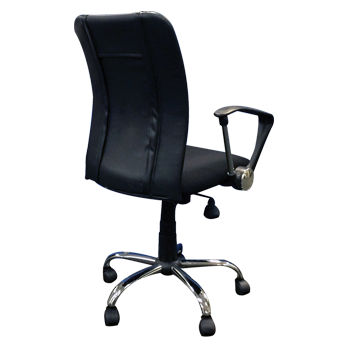

In [4]:
im

## Convert to jpg image directly failed

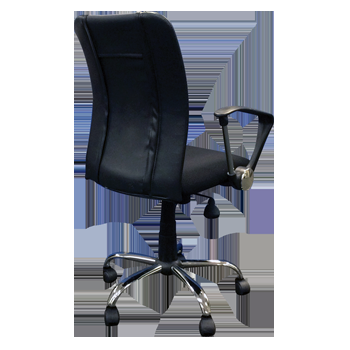

In [5]:
im_rgb = im.convert('RGB')
im_rgb

##### Why there's color in the background?

##### This converted image was tagged as lifestyle

## Transform the background to white succeeded

In [24]:
pixels = im.load()
pixels[3,4]

(255, 255, 255, 0)

CPU times: user 4.95 ms, sys: 809 µs, total: 5.76 ms
Wall time: 4.74 ms


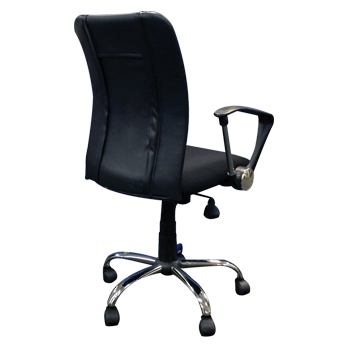

In [40]:
%%time
# im.load() # required for png.split()

new = Image.new("RGB", im.size, (255, 255, 255))
new.paste(im, mask=im.split()[3]) # 3 is the alpha channel

new #.save('foo.jpg', 'JPEG', quality=80)

CPU times: user 5.59 ms, sys: 1.08 ms, total: 6.67 ms
Wall time: 5.54 ms


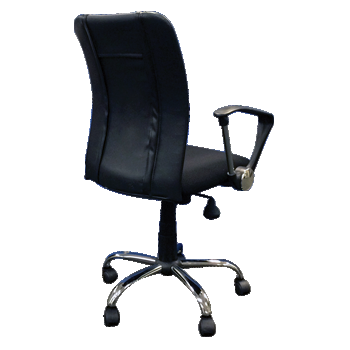

In [37]:
%%time

import numpy as np
x = np.array(im)
r, g, b, a = np.rollaxis(x, axis = -1)
r[a == 0] = 255
g[a == 0] = 255
b[a == 0] = 255
x = np.dstack([r, g, b])
im_w = Image.fromarray(x, 'RGB')
im_w

##### The new image was tagged as silo_angle